# Homework 1
### Charlie Gao, James Morris, Nhan Do

1. **Data Mining Applications**<br>
    Suppose you are working as a data mining consultant for an Internet Search Engine Company. Briefly 
    discuss how data mining can help the company by giving one example each of an application for which
    the techniques for (i) regression (ii) classification, (iii) anomaly detection can be used.
    <br>
    > *We discussed these topics, and came up with responses. They are not listed here.*
    
2. **Maximum Likelihood Estimation**<br>
    Wishing to estimate the average time it takes to load Canvas on her tablet, Alice does the following
    study: She records the time x<sub>i</sub> that Canvas takes to load (in milliseconds), e i = 1, ..., N, at N randomly
    selected time-points during one day. Suppose that the time it takes to load the webpage can be well
    represented by λ<sup>e−λx</sup> with (unknown) parameter, λ. Derive the maximum likelihood estimate for λ
    from first principles. (i.e. do not just write down the answer).

In [6]:
# Insert code here
#imports
%matplotlib inline  
import numpy as np; np.random.seed(50)
import seaborn as sns; sns.set(color_codes=True)
import matplotlib as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal

3. **Bivariate Visualization and Mathematical Form** (actually \#3 but Markdown is not perfect)<br>
    Suppose X and Y are two random variables whose joint distribution is Normal (Gaussian), centered at(0,0)
    and with correlation ρ. (See “Bivariate Case” in the Wikipedia entry for “Multivariate Normal 
    Distribution” for the equation, or use just use the vector form given in the class notes, with 
    σ<sub>12</sub> = σ<sub>21</sub> = ρσ<sub>x</sub>σ<sub>y</sub>). Consider 2 cases:
    
    i)  σ<sup>2</sup><sub>x</sub> = 4; σ<sup>2</sup><sub>y</sub> = 9; ρ = 0
    <br>
    ii) σ<sup>2</sup><sub>x</sub> = 4; σ<sup>2</sup><sub>y</sub> = 9; ρ = 0.5
    
    a) Obtain contour plots for each of the two distributions using Python http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html .
    
    b) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).
    
    c) Consider the bivariate Normal Distribution given in part (ii). Reading the “Bivariate Case” under
    "Conditional distributions" in the Wikipedia entry will help you answer this problem; alternatively
    you can consult any undergraduate text on probability/statistics. What is the mathematical form
    of the conditional distribution that is obtained when (a) x is set to 1, and (b) when y is set to
    1? (no need to actually derive the formulae from first principles; rather just obtain the result by
    substition in the formula for a bivariate Gaussian.

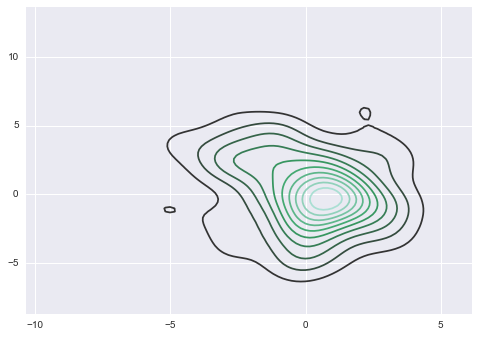

In [7]:
#setup
# number 3 part a part i
mean, cov = [0, 0], [(4, 0), (0, 9)]
x1, y1 = np.random.multivariate_normal(mean, cov, size=50).T
ax1 = sns.kdeplot(x1, y1)

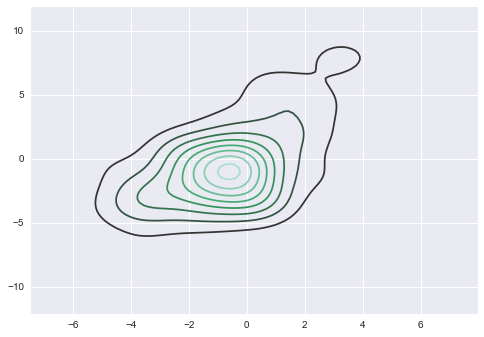

In [8]:
# number 3 part a part ii
mean, cov = [0, 0], [(4, 3), (3, 9)]
x2, y2 = np.random.multivariate_normal(mean, cov, size=50).T
ax2= sns.kdeplot(x2, y2)

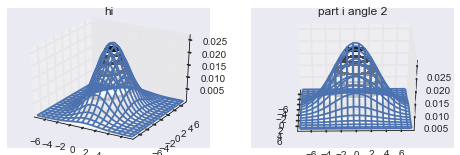

In [14]:
# number 3 part b part i
import matplotlib.pyplot as plt

mean, cov = [0, 0], [(4, 0), (0, 9)]
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
x, y = np.mgrid[-7.5:7.5:.1, -7.5:7.5:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mean,cov)

plt.title("hi")
plt.contourf(x, y, rv.pdf(pos))
ax.plot_wireframe(x, y, rv.pdf(pos), rstride=8, cstride=8)

ax = fig.add_subplot(222, projection='3d')
plt.title("part i angle 2")
plt.contourf(x, y, rv.pdf(pos))
ax.plot_wireframe(x, y, rv.pdf(pos), rstride=8, cstride=8)
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()


###### Problem 3 part c
> `x|(y=1) = N( 0+(2/3)*0.5*(1-0) , (1-(0.5)^2)*4 ) = N((1/3),3)`

> `y|(x=1) = N( 0+(3/2)*0.5*(1-0) , (1-(0.5)^2)*9 ) = N((3/4),(27/4))`

4. **Exploratory Data Analysis using Python** (again, actually \#4 but Markdown isn't prefect)<br>
    The student data set (found on Canvas) records properties of 657 students. For a description of the
    data, see http://cran.r-project.org/web/packages/LearnBayes/LearnBayes.pdf. Python packages that
    will be useful: `Pandas`, `Matplotlib`, and `Seaborn`.
    
    (a) Construct a histogram of the variable `Shoes`. (Use 20 bins)
    
    (b) Use data visualization to check if the variable `Dvds` (approximately) follows a log-normal distribution.
    
    (c) Summarize the variable `Haircut` using the Panda’s describe command. Also, report the 2.5th and 97.5th percentiles.
    
    (d) Construct a barplot of the individual values of `Drink` that were observed. Also, highlight the 
    distribution of the variable `Drink` between the two genders on the same barplot.
    
    (e) Construct a scatter plot of the variables `ToSleep` and `WakeUp`. Do you observe a positive correlation
    between the two variables?
    
    Note: Omit missing values if any are present.

In [ ]:
#Insert code here
print "ok"

5. **Regression with scikit-learn** (actually \#5)<br>
    For this problem, we will be using the scikit-learn package in Python to predict housing prices using 
    regression. The housing data can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/.
    
    (a) Fit a simple linear regression of medv on lstat. What is the coefficient on lstat and what is its interpretation?
    
    (b) Plot medv and and lstat in a scatter plot with the regression line. Comment on the fit.

    (c) Split the data randomly into a training and test set (1/3 for test). Train a multiple linear regression 
    on all the variables using the training data and evaluate the trained model on the test data using
    root mean squared error. Discuss the results.

    (d) Let us try to fit an MLR to this dataset, with MEDV as the dependent variable. MEDV has 
    a somewhat longish tail and is not so Gaussian-like, so we will take a log transform, and then 
    predict LMDEV instead. (You should convince yourself that this is a better idea by looking at the 
    histograms and quantile plots to assess normality; however no need to submit such plots). Keep the 
    first 350 records as a training set (call it Bostrain) which you will use to fit the model; the 
    remaining 156 will be used as a test set (Bostest). <br>
    Use only the following variables in your model: LMEDV ∼ LST AT + RM + CRIM + ZN + CHAS.<br>
      i. Report the MSE obtained on Bostrain. How much does this increase when you score your model on Bostest?<br>
      ii. Report the coefficients obtained by learning the regression model.<br>
      iii. Do you think your MLR model is reasonable for this problem? You may look at the distribution 
      of residuals to provide an informed answer.

In [ ]:
#Insert Code here